In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import metrics

import statsmodels.api as sm

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## Logistic Regression Review
Please complete these series of exercises within your groups.

1) Create a logistic regression model based on the data below.

2) Determine which predictors are significant. (Use sm.logit() and p<0.1)

3) Split Test/Train and re-run the model now that you have chosen only significant variables. (Use SKLearn's LogisticRegression). Find test accuracy.

4) Figure out what your best value for $C=\frac{1}{\lambda}$ is. (Test at least 4 values)

5) Re-run the model for this tuned hyperparameter.

6) Create a holdout dataset.

7) Find the holdout accuracy

8) Find the 5-fold cross-validation on the non-holdout data (using cross_val_score)

9) Create a confusion matrix for this new model.

10) Plot your ROC curve.

In [14]:
#Data Generation
Xs, y = datasets.make_classification(n_features=5,n_informative=3,n_redundant=0)

In [15]:
#Step 1
logit = sm.Logit(y,Xs).fit()

Optimization terminated successfully.
         Current function value: 0.250960
         Iterations 8


In [16]:
#Step 2
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Fri, 15 Mar 2019   Pseudo R-squ.:                  0.6379
Time:                        01:21:28   Log-Likelihood:                -25.096
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 2.827e-18
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5559      0.397     -1.402      0.161      -1.333       0.221
x2             2.5942      0.568      4.568      0.000       1.481       3.707
x3             0.3510      0.365      0.962      0.336      -0.364       1.066
x4             0.6168      0.299      2.062      0.039       0.031       1.203
x5             0.5535      0.332      1.668      0.095      -0.097       1.204
==============================================================================
"""

In [30]:
#Step 3
sigx = pd.DataFrame(Xs).iloc[:,[1,3,4]]
X_train, X_test, y_train, y_test = train_test_split(sigx, y, test_size=0.2)

logreg = LogisticRegression(solver='lbfgs').fit(X_train,y_train)
print('Accuracy:',logreg.score(X_test,y_test))

Accuracy: 0.9


In [36]:
#Step 4
Cs = [0.1,1,10,100]
accs = []
logreg = LogisticRegression(solver='lbfgs')

for i in Cs:
    logreg.fit(X_train,y_train)
    accs.append(logreg.score(X_test,y_test))
    
print(accs)

[0.9, 0.9, 0.9, 0.9]


In [34]:
#Step 5
logreg = LogisticRegression(solver='lbfgs',C=0.1)
logreg.fit(X_train,y_train)
print(logreg.score(X_test,y_test))

0.85


In [37]:
#Step 6
X_train, X_ho, y_train, y_ho = train_test_split(sigx, y, test_size=0.2)

In [40]:
#Step 7
logreg = LogisticRegression(solver='lbfgs',C=0.1)
logreg.fit(X_train,y_train)
print(logreg.score(X_ho,y_ho))

0.85


In [39]:
#Step 8
print(cross_val_score(logreg,X_train,y_train,cv=10).mean())

0.9027777777777779


In [48]:
#Step 9
logreg = LogisticRegression(solver='lbfgs',C=0.1)
logreg.fit(X_train,y_train)
print(metrics.confusion_matrix(y_ho,logreg.predict(X_ho)).transpose())

[[10  0]
 [ 3  7]]


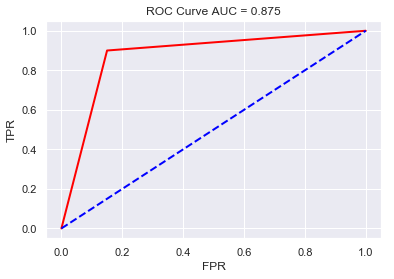

In [49]:
#Step 10
X_train, X_test, y_train, y_test = train_test_split(sigx, y, test_size=0.4)
logreg = LogisticRegression(solver='lbfgs',C=0.1)
logreg.fit(X_train,y_train)
aucscore = metrics.roc_auc_score(logreg.predict(X_test),y_test)

##Computing false and true positive rates
fpr, tpr,_= metrics.roc_curve(logreg.predict(X_test),y_test,drop_intermediate=False)

##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve AUC = '+str(aucscore.round(4)))
plt.show()